In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Hard Voting

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X,y = make_moons(n_samples = 500,noise = 0.3,random_state = 42)


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)


# creating a voting classifer that it defines by Logistic,Random forest and SVM
voting_clf = VotingClassifier(
    estimators = [
        ("lr",LogisticRegression(random_state = 42)),
        ("rf",RandomForestClassifier(random_state = 42)),
        ("svc",SVC(random_state = 42))
    ]
)

#fitting the voit classifier on the training data
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
# Accessing the named_estimators_ attribute of the VotingClassifier
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
# making predictions using the VotingClassifier on the first sample of the data
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
#Accessing the list of base estimators within the VotingClassifier
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

In [ ]:
#Generating predictions for the first sample of the test using individual base estimators
[clf.predict(X_test[:1])for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
#claculating the overall acuuracy of the VotingClassifier on the test
voting_clf.score(X_test,y_test)

0.912

#Soft Voting

In [ ]:
#Configuring the VotingClassifier for soft voting and enabling probability estimates for svc

voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True   # we dont use _ in order to modify the original model
voting_clf.fit(X_train,y_train)

#Evaluating the VotingClassifier with soft voting on the test set
voting_clf.score(X_test,y_test)

0.92

#Bagging and Pasting

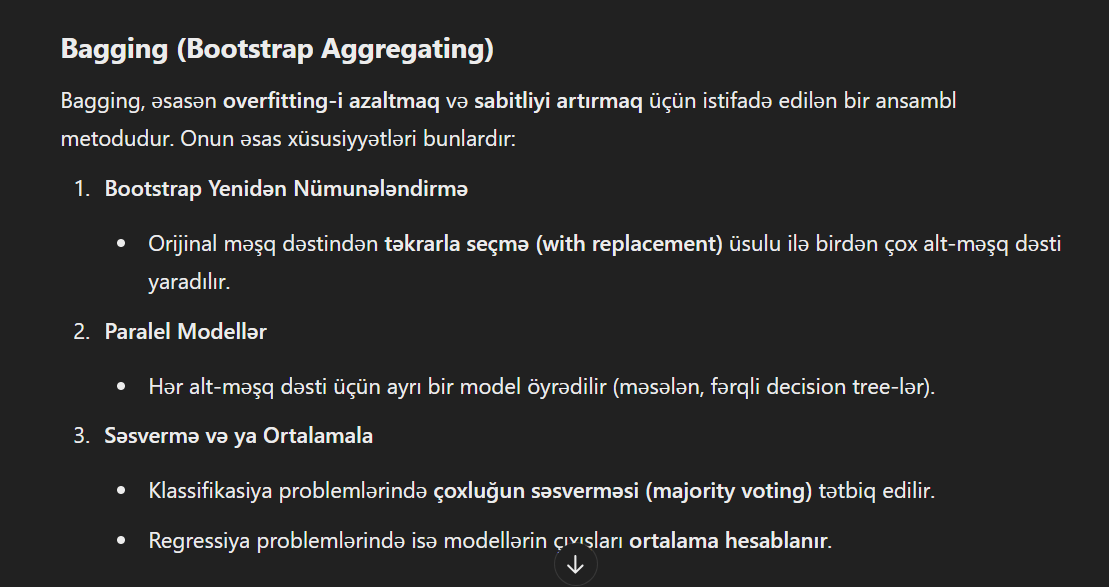

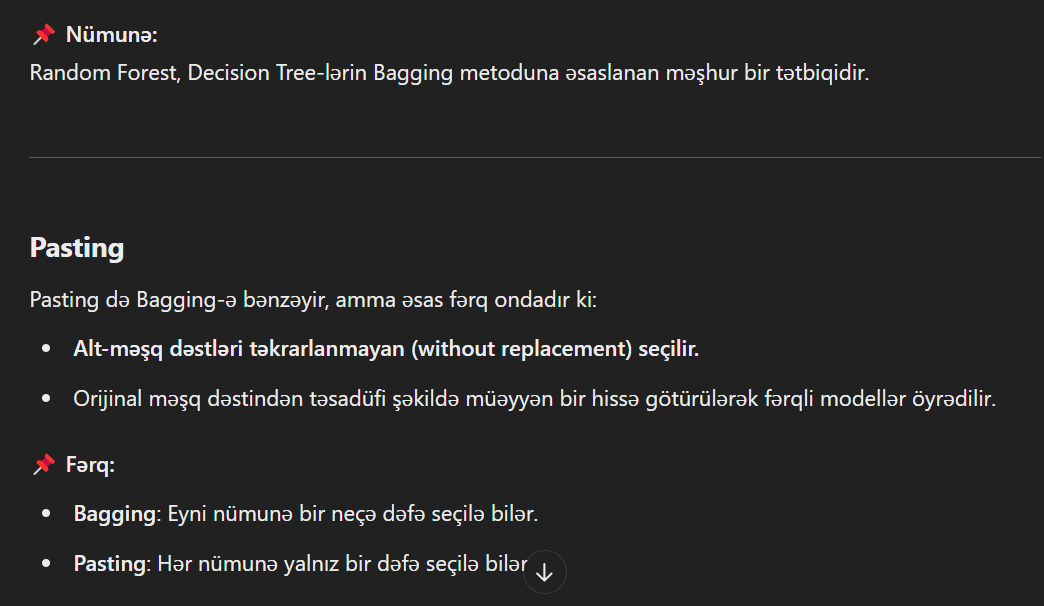

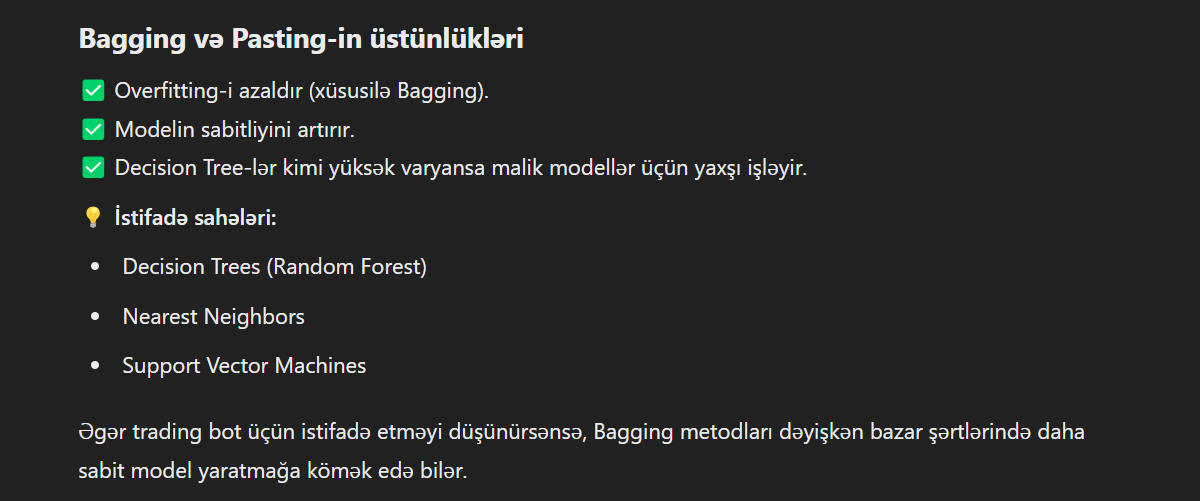

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Creating a BaggingClassifier with DecisionTreeClassifier as the base estimator
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            max_samples=100,
                            n_jobs=-1,
                            random_state = 42)
# fitting the BaggingClassifier on the training data
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:

bag_clf.score(X_test,y_test)

#bagging ve boosting arasindaki ferq odur ki boosting daha overfitting edicidi

0.904

#Out-of-Bag Evaluation

In [ ]:
# creating a BaggingClassifier with out of bag(OOB) score calculation
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            oob_score = True,
                            n_jobs = -1,
                            random_state = 42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

Bagging (Bootstrap Aggregating):
Uses the same data multiple times: Bagging involves creating multiple bootstrap samples (random samples with replacement) from the original dataset. These samples may contain duplicate instances.

Trains different parts of the same data with the same model: Each bootstrap sample is used to train a separate instance of the same model. The final prediction is then an average or majority vote of the predictions from each model.

Pasting
Uses it once and does not repeat: Pasting also involves creating multiple samples, but without replacement. Each instance is selected only once in each sample.

Trains different parts of the same data with the same model: Similar to bagging, pasting trains separate models on different samples.

So, in both bagging and pasting, different parts of the same data are used to train different models. The main difference lies in whether the sampling is done with or without replacement.

Bagging samples with replacement, while pasting samples without replacement. Both techniques aim to reduce overfitting and improve model generalization by introducing diversity through multiple models trained on different subsets of the data.

In bagging, on average, each base model is trained on about 63% of the original dataset. This is because, during bootstrap sampling, about 37% of the data points are not included in each bootstrap sample.

When you set the oob_score parameter to True in a bagging ensemble (e.g., BaggingClassifier or BaggingRegressor in scikit-learn), it indicates that you want to evaluate the model's performance on the out-of-bag (OOB) instances – the approximately 37% of data points that were not included in the bootstrap sample for each base model.

The OOB score serves as a validation metric without the need for a separate validation set. It helps estimate how well the ensemble is likely to generalize to unseen data. This is a useful feature of bagging, providing a built-in validation mechanism during the training process.

In [ ]:
from sklearn.metrics import accuracy_score

#Generating predictions using the BaggingClassifier on the test set
y_pred = bag_clf.predict(X_test)



#Calculating the accuracy score comparing true labels - y_test and prediction labels - y_pred
accuracy_score(y_test,y_pred)

0.92

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500,
           max_leaf_nodes = 16,
           n_jobs = -1,
           random_state = 42)

rnd_clf.fit(X_train,y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features = 'sqrt',max_leaf_nodes = 16),
    n_estimators = 500,
    n_jobs = -1,
    random_state = 42
)

bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)

In [ ]:
np.all(y_pred_bag == y_pred_rf)

True

#Feature Importance

In [ ]:
from sklearn.datasets import load_iris
# loading the iris dataset as a dataframe
iris = load_iris(as_frame = True)

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 random_state = 42)

rnd_clf.fit(iris.data,iris.target)


for score,name in zip(rnd_clf.feature_importances_,iris.data.columns):
  print(round(score,2)*100,'%',name)

11.0 % sepal length (cm)
2.0 % sepal width (cm)
44.0 % petal length (cm)
42.0 % petal width (cm)


#Boosting

AdaBoosting

Correct Mistakes on weak models and boosts the result

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Creating an AdaBoostClassifier with a base DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 30,
    learning_rate = 0.5,
    random_state = 42
)
# Fitting the AdaBoostClassifier on the training data
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [ ]:
ada_clf.score(X_test,y_test)

0.88

#Gradient Boosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
#Generating synthetic data(X) and corresponding target values(y)

X = np.random.rand(100,1) - 0.5
y = 3 * X[:,0] ** 2 +0.05 * np.random.randn(100)    # y = 3x^2 + Gaussian noise

# creating a DecisionTreeRegressor with max_septh constraint
tree_reg1 = DecisionTreeRegressor(max_depth = 2,random_state = 42)

#Fitting the DecisionTreeRegressor on the synthetic data
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth = 2,random_state = 43)

tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [ ]:
y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth = 2,random_state = 44)

tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [ ]:
# generating new data points (X_new)

X_new = np.array([[-0.4],[0.],[0.5]])

sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

instead

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#creating a GradientBoostingRegressir with the specified parameters
gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=3,
                                 learning_rate=1.0,
                                 random_state=42)
#Fitting the GradientBoostingRegressor
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

As the learning rate increases, we reduce the number of estimators so that it is possible to arrive at a reach point

When the learning rate is increased, it means that each weak learner's contribution to the ensemble is stronger. To avoid overfitting and find an optimal trade-off between accuracy and generalization, it's common to reduce the number of estimators (trees) in the ensemble.

Here's a breakdown of the idea:

Low Learning Rate (e.g., 0.01 or 0.1):
Each tree has a smaller impact on the final prediction.
Requires a larger number of trees to fit the model well.
High Learning Rate (e.g., 0.5 or 1.0):
Each tree has a more substantial impact on the final prediction.
Requires a smaller number of trees to fit the model well.
By decreasing the number of trees as the learning rate increases, you can control the complexity of the overall model. This helps prevent overfitting and ensures that the boosting algorithm converges to a good solution. This strategy is often part of the hyperparameter tuning process in gradient boosting, where the learning rate and the number of estimators are tuned together.

In scikit-learn's GradientBoostingRegressor or GradientBoostingClassifier, you can achieve this by adjusting the n_estimators parameter based on your chosen learning rate.

In [ ]:
gbrt_best = GradientBoostingRegressor(
    max_depth = 2,
    learning_rate = 0.05,
    n_estimators = 500,
    n_iter_no_change = 10,
    random_state = 42            #n_iter_no_change  -->  10 dene estimator elave edenden sonra netice deyismirse
)

gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

AdaBoost (Adaptive Boosting):
Takes all the data and corrects errors: AdaBoost adapts by assigning different weights to instances in the training set. It focuses more on instances that were misclassified by the previous weak learners.

Global approach to correcting errors: The entire dataset is considered during each iteration, and weights are adjusted to emphasize correcting errors made on the entire dataset.

Gradient Boosting:
Selects and corrects errors through gradients: Gradient boosting builds a sequence of weak learners, and each learner corrects the errors of the combined ensemble of the previous learners. The emphasis is on minimizing the loss function by finding the gradient of the loss with respect to the predicted values.
Local approach to correcting errors: Each new weak learner in gradient boosting focuses on the errors made by the current ensemble, rather than adjusting weights for the entire dataset. This leads to a more localized and targeted correction of errors.

In [ ]:
#Accesing the number of fitted estimators in the best GradientBoostingRegressor
gbrt_best.n_estimators_

92

#StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('lr',LogisticRegression(random_state = 42)),
        ('rf',RandomForestClassifier(random_state = 42)),
        ('svc',SVC(probability = True,random_state = 42))
    ],
    final_estimator=RandomForestClassifier(random_state = 43),
    cv = 5
)

stacking_clf.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [ ]:
stacking_clf.score(X_test,y_test)

0.928

ExtraTreesClassifier is also Ensemble Model

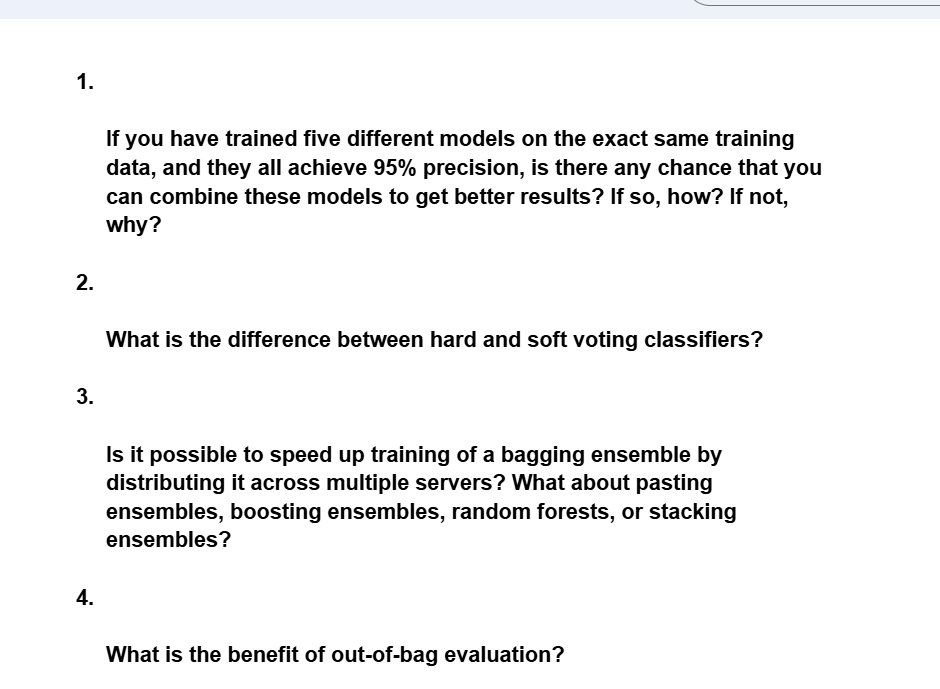

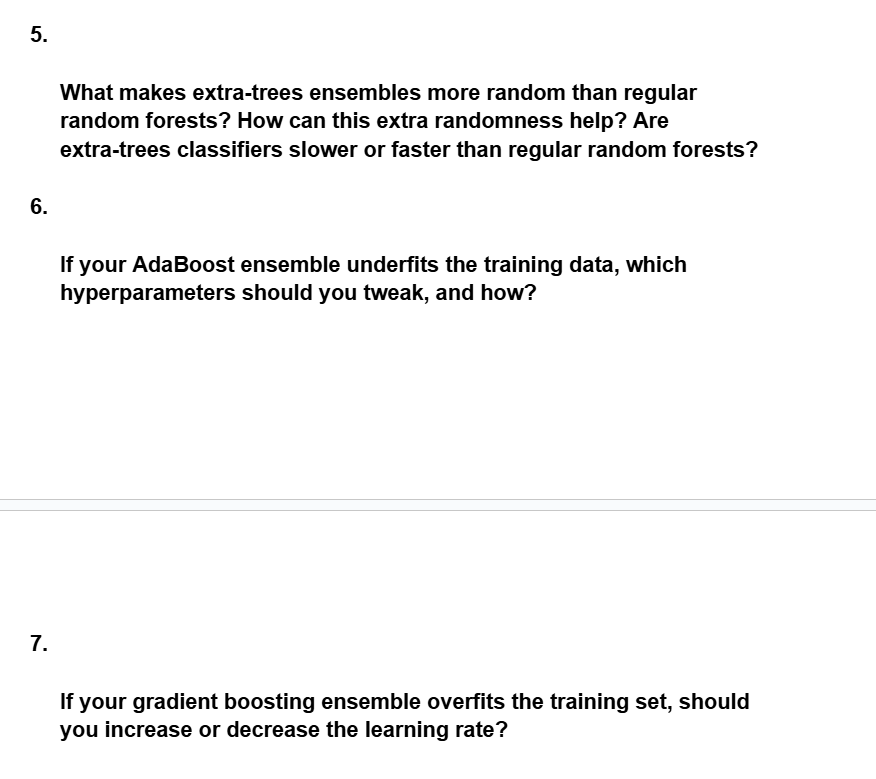

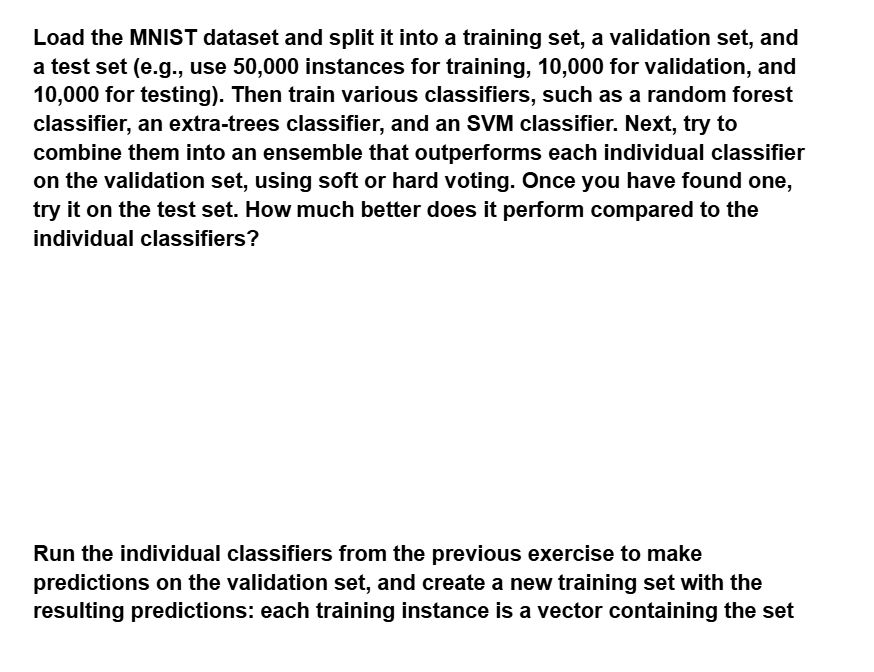

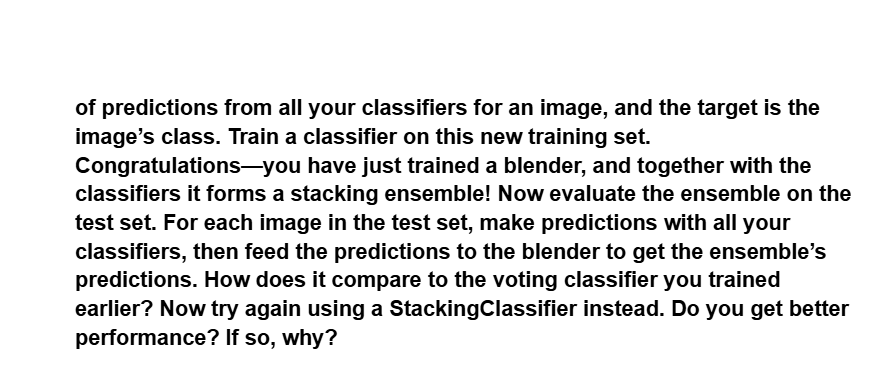

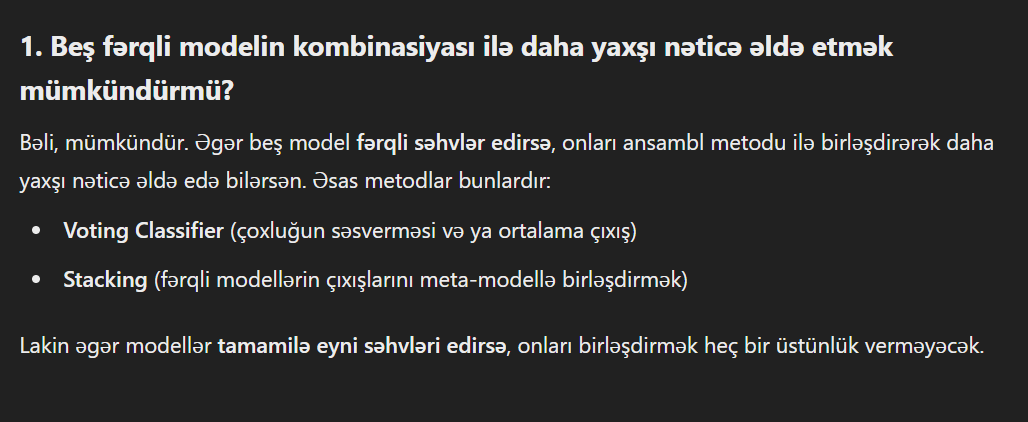

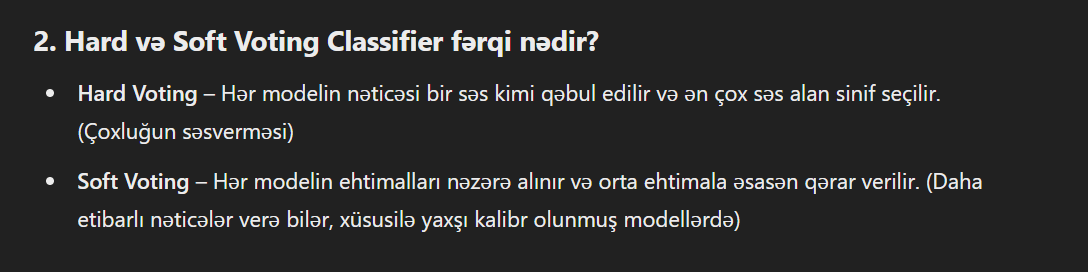

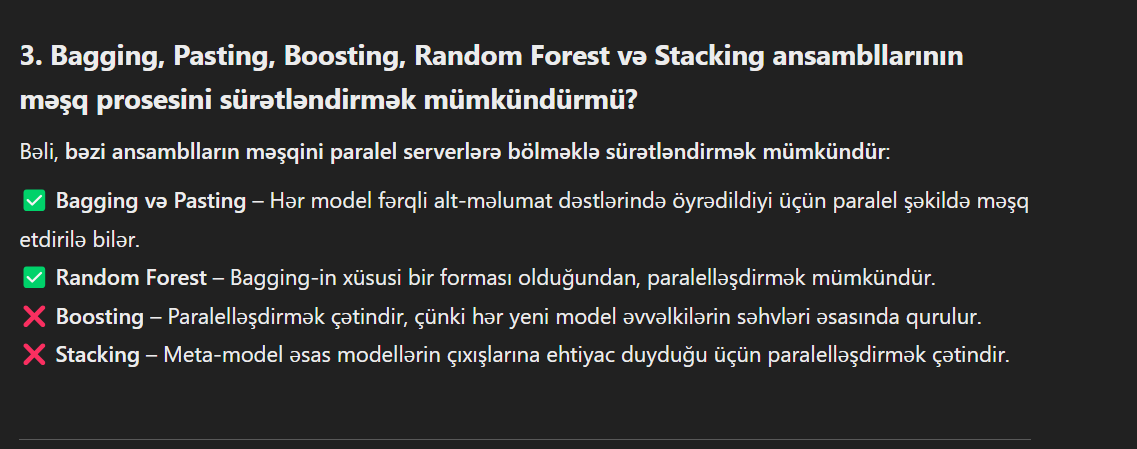

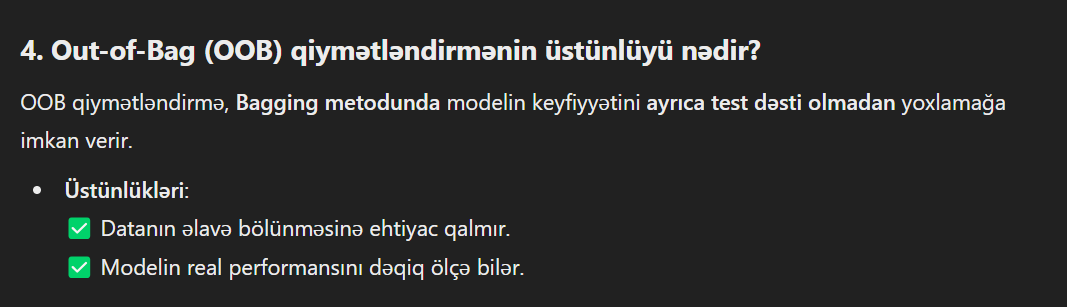

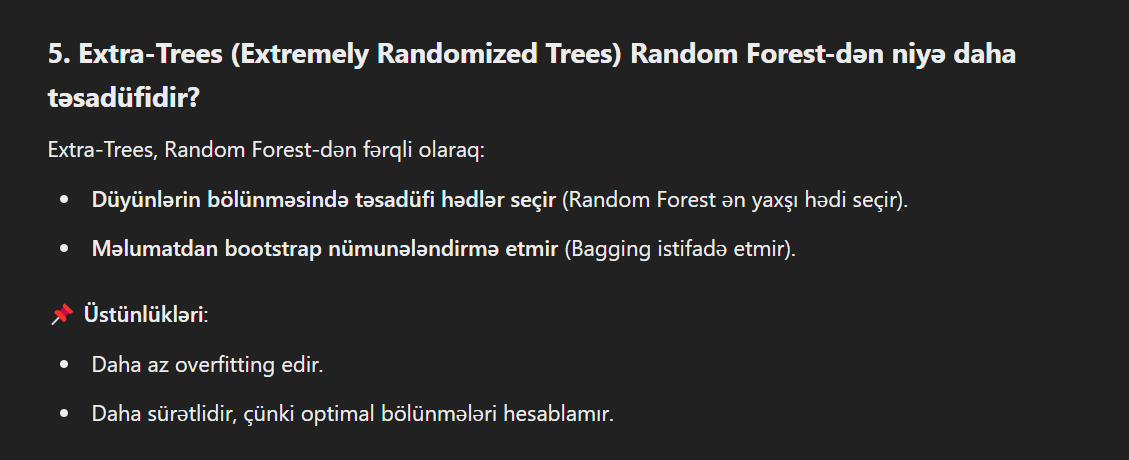

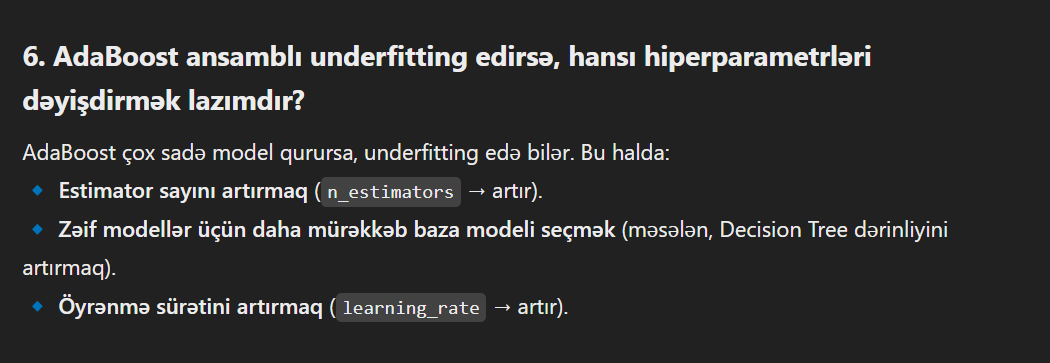

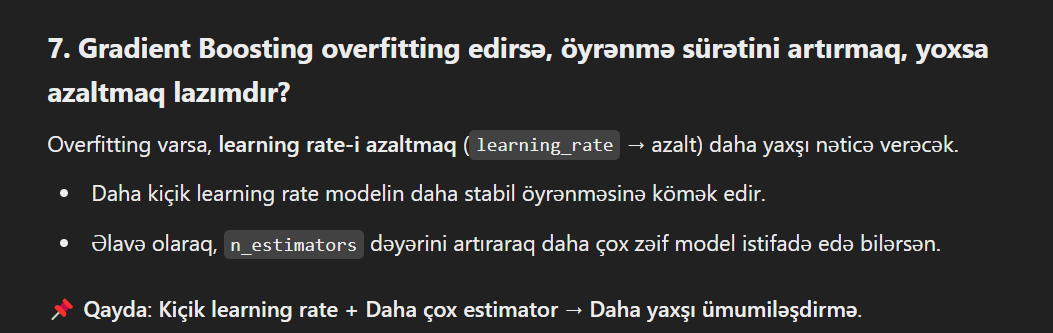

In [ ]:
!kaggle datasets download aadeshkoirala/mnist-784

Dataset URL: https://www.kaggle.com/datasets/aadeshkoirala/mnist-784
License(s): unknown
mnist-784.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/mnist-784.zip

Archive:  /content/mnist-784.zip
replace mnist_784.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv("/content/mnist_784.csv")

In [ ]:
df

In [ ]:
X_train = df.iloc[:50000, :784].values
X_train = pd.DataFrame(X_train)
X_train

In [ ]:
X_validation = df.iloc[50000:60000, :784].values
X_validation = pd.DataFrame(X_validation)
X_validation

In [ ]:
X_test = df.iloc[60000:, :784].values
X_test = pd.DataFrame(X_test)
X_test

In [ ]:
y_train = df.iloc[:50000,784].values
y_train = pd.DataFrame(y_train)
y_train

In [ ]:
y_validation = df.iloc[50000:60000,784].values
y_validation = pd.DataFrame(y_validation)
y_validation

In [ ]:
y_test = df.iloc[60000:, 784].values
y_test = pd.DataFrame(y_test)
y_test

In [ ]:
voting_clf_ = VotingClassifier(
    estimators = [
        ("lr",LogisticRegression(random_state = 42)),
        ("rf",RandomForestClassifier(random_state = 42)),
        ("svc",SVC(random_state = 42))
    ]
)

In [ ]:
voting_clf_.fit(X_train,y_train)

In [ ]:
for name,clf in voting_clf_.named_estimators_.items():
  print(name,"=",clf.score(X_test,y_test))

In [ ]:
#Configuring the VotingClassifier for soft voting and enabling probability estimates for svc

voting_clf_.voting = 'soft'
voting_clf_.named_estimators['svc'].probability = True   # we dont use _ in order to modify the original model
voting_clf_.fit(X_train,y_train)

#Evaluating the VotingClassifier with soft voting on the test set
voting_clf_.score(X_test,y_test)